In [13]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "ashleya30"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/ashleya30/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/ashleya30/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 6, 2026**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

The objective of this experiment is to determine whether an aging time of 3, 4, or 5 weeks has a statistically significant effect on the bitterness of an IPA beer.

**Question 2.** Specify the outcome variable

The outcome variable is IBUs (International Bitterness Units). It is a continuous quantitative variable.

**Question 3.** Specify the independent variable. What are some possible lurking variables?

The independent variable is aging time (3, 4, or 5 weeks). It is a categorical variable. Some possible lurking variables are related to any variations in physical environment throughout the aging time, such as temperature, storage conditions, or even equipment malfunctions.

**Question 4.** Briefly explain why a completely randomized design may be appropriate for this experiment.

Randomized design naturally helps with validity, as it lessens the influence of any potential lurking variables. This particular experiment also benefits because only one factor is being tested, all bottles start relatively similar in the beginning, and the design is fairly easy to implement.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null Hypothesis - The mean IBU levels are equal across all three aging times.

Alternative Hypothesis - The mean IBU levels differ for at least one aging time.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

In [14]:
import pandas as pd

## Import the IPA Data ##

ipa = pd.read_excel("IPA.xlsx")

## Data Integrity Check with .info ##

ipa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


         count   mean   std    min  median    max
Weeks                                            
3 Weeks     10  49.22  8.30  35.31   50.78  59.62
4 Weeks     10  62.75  8.25  47.82   65.78  71.70
5 Weeks     10  69.72  5.63  60.09   70.95  78.03


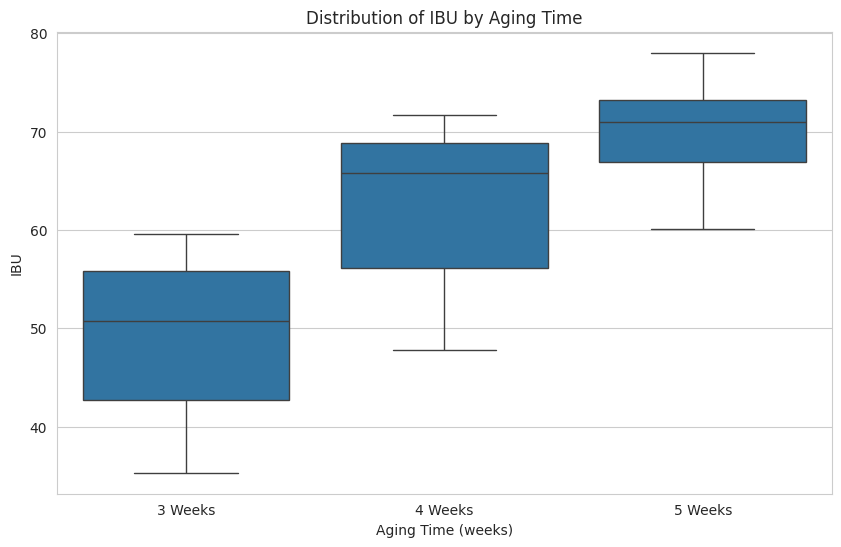

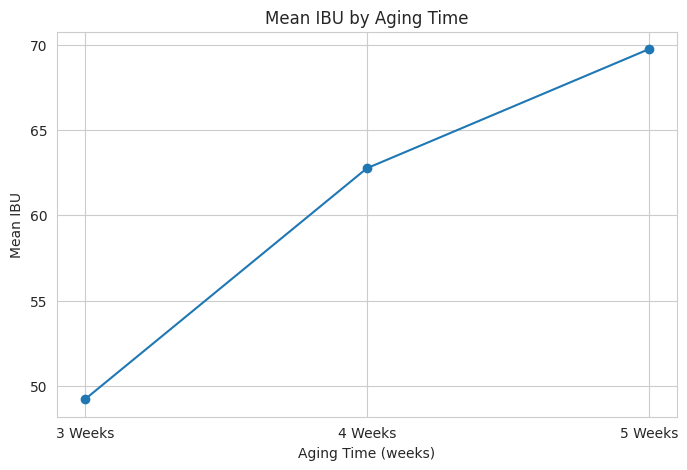

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary = ipa.groupby('Weeks')['IBU'].agg(['count', 'mean', 'std', 'min', 'median', 'max']).round(2)
print(summary)

sns.set_style("whitegrid")

# Boxplot of IBU by aging time
plt.figure(figsize=(10, 6))
sns.boxplot(data=ipa, x='Weeks', y='IBU')
plt.title("Distribution of IBU by Aging Time")
plt.xlabel("Aging Time (weeks)")
plt.ylabel("IBU")
plt.show()

# Mean IBU by aging time
means = ipa.groupby('Weeks')['IBU'].mean()

plt.figure(figsize=(8, 5))
plt.plot(means.index, means.values, marker='o')
plt.title("Mean IBU by Aging Time")
plt.xlabel("Aging Time (weeks)")
plt.ylabel("Mean IBU")
plt.show()

Based on the summary statistics and visualizations, the mean IBU increases with longer aging times. This positive trend supports the alternative hypothesis more strongly.

**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

ANOVA F-statistic: nan
ANOVA p-value: nan


/tmp/ipython-input-902538137.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(group_3, group_4, group_5)


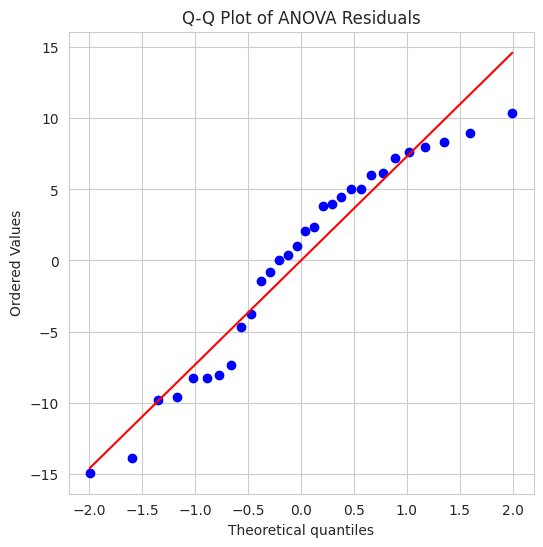

Shapiro-Wilk p-value: 0.0630


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

# One-way ANOVA
group_3 = ipa[ipa['Weeks'] == 3]['IBU']
group_4 = ipa[ipa['Weeks'] == 4]['IBU']
group_5 = ipa[ipa['Weeks'] == 5]['IBU']

f_stat, p_value = stats.f_oneway(group_3, group_4, group_5)
print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"ANOVA p-value: {p_value:.4f}")

# Q-Q plot - Visual Method
ipa['Residuals'] = ipa['IBU'] - ipa.groupby('Weeks')['IBU'].transform('mean')

plt.figure(figsize=(6, 6))
stats.probplot(ipa['Residuals'], dist="norm", plot=plt)
plt.title("Q-Q Plot of ANOVA Residuals")
plt.show()

# Shapiro-Wilk Test - Testing Method
shapiro_stat, shapiro_p = shapiro(ipa['Residuals'])
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

The results support the assumption of normality. p > 0.05 (0.0630).

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

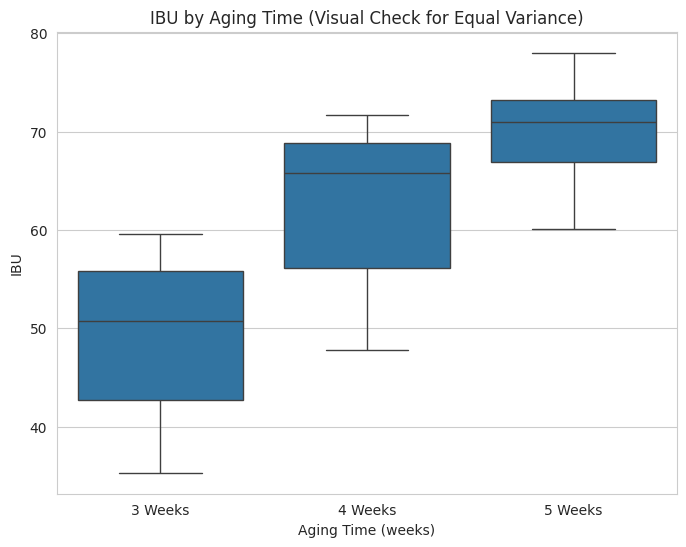

Levene's test p-value: nan


/tmp/ipython-input-403618060.py:18: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  levene_stat, levene_p = levene(group_3, group_4, group_5)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene

# Boxplot - Visual Method
plt.figure(figsize=(8, 6))
sns.boxplot(data=ipa, x='Weeks', y='IBU')
plt.title("IBU by Aging Time (Visual Check for Equal Variance)")
plt.xlabel("Aging Time (weeks)")
plt.ylabel("IBU")
plt.show()

# Levene's Test - Testing Method
group_3 = ipa[ipa['Weeks'] == 3]['IBU']
group_4 = ipa[ipa['Weeks'] == 4]['IBU']
group_5 = ipa[ipa['Weeks'] == 5]['IBU']

levene_stat, levene_p = levene(group_3, group_4, group_5)

print(f"Levene's test p-value: {levene_p:.4f}")

The results support the assumption of homogeneity of variance. p > 0.05 (0.325).

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

In [18]:
from scipy.stats import f_oneway

group_3 = ipa[ipa['Weeks'] == 3]['IBU']
group_4 = ipa[ipa['Weeks'] == 4]['IBU']
group_5 = ipa[ipa['Weeks'] == 5]['IBU']

f_stat, p_value = f_oneway(group_3, group_4, group_5)

print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.4f}")

F-statistic: nan
p-value: nan


/tmp/ipython-input-3701671902.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(group_3, group_4, group_5)


The alternative hypothesis is more strongly supported because the extremely small p-value indicates that the mean IBU level differs for at least one aging time. The extremely large F-statistic indicates that the variation between group means is larger than variation within groups.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD post-hoc test
tukey = pairwise_tukeyhsd(endog=ipa['IBU'], groups=ipa['Weeks'], alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
3 Weeks 4 Weeks   13.535 0.0011  5.2205 21.8495   True
3 Weeks 5 Weeks   20.509    0.0 12.1945 28.8235   True
4 Weeks 5 Weeks    6.974 0.1131 -1.3405 15.2885  False
------------------------------------------------------


3 weeks vs. 4 weeks and 3 weeks vs. 5 weeks are significantly different from each other. 4 weeks vs. 5 weeks had no significant difference. It can be inferred that the major increase in bitterness occurs between weeks 3 and 4.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses. Additionally, describe any limitations of the experiment and/or your analyses, and suggest potential improvements for future experiments of this nature.

The results of this experiment provided strong evidence that aging time has a statistically significant effect on the bitterness of an IPA beer. 3 weeks produced the lowest bitterness, while 4 and 5 weeks produced similarly high levels of bitterness.

The most notable limitation of these analyses is the limited sample size and batch. All bottles came from one batch, and only 10 observations were made per group. Any lurking variables also pose concern.

For future improvements, this experiment can be replicated with multiple batches or bigger sample sizes. Factors from the physical environment can be checked, such as monitoring temperature. The time range can also be extended to better understand the full timeline of bitterness, in case an optimal duration lies outside of 3-5 weeks.